<a href="https://colab.research.google.com/github/semaHbo/ev-enerji-tahmini/blob/main/Model_Training/Ridge__Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/ev-enerji-tahmini/train1_scaled_cleaned.csv'
val_path = '/content/drive/MyDrive/ev-enerji-tahmini/val1_scaled_cleaned.csv'

train_df = pd.read_csv(train_path, index_col='date', parse_dates=True)
val_df = pd.read_csv(val_path, index_col='date', parse_dates=True)

X_train = train_df.drop(columns=['Enerji_Tuketimi'])
y_train = train_df['Enerji_Tuketimi']
X_val = val_df.drop(columns=['Enerji_Tuketimi'])
y_val = val_df['Enerji_Tuketimi']


Mounted at /content/drive


In [3]:
#model olusturma
ridge_model = Ridge(alpha=1.0)

# egitme
ridge_model.fit(X_train, y_train)

# tahmin
y_pred = ridge_model.predict(X_val)


In [4]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Ridge Regression Performansı (Validation Seti)")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


Ridge Regression Performansı (Validation Seti)
MAE  : 53.5194
MSE  : 8984.9828
RMSE : 94.7891
R²   : 0.1080


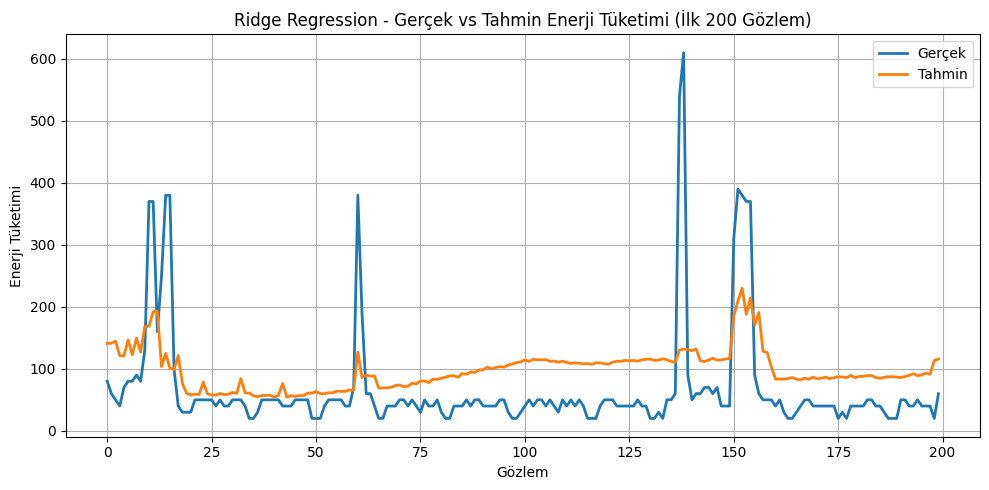

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(y_val.values[:200], label="Gerçek", linewidth=2)
plt.plot(y_pred[:200], label="Tahmin", linewidth=2)
plt.title("Ridge Regression - Gerçek vs Tahmin Enerji Tüketimi (İlk 200 Gözlem)")
plt.xlabel("Gözlem")
plt.ylabel("Enerji Tüketimi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
alphas = [0.01, 0.1, 1, 10, 100]
results = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    results.append({
        'Alpha': alpha,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    })

results_df = pd.DataFrame(results)
print(results_df)


    Alpha        MAE          MSE       RMSE        R²
0    0.01  53.522523  8983.989245  94.783908  0.108069
1    0.10  53.522230  8984.080252  94.784388  0.108060
2    1.00  53.519367  8984.982820  94.789149  0.107970
3   10.00  53.498148  8993.313772  94.833084  0.107143
4  100.00  53.473906  9041.163139  95.085031  0.102393
